In [1]:
print("Hello")

Hello


In [3]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt

In [35]:
img_orig = cv2.imread("para2.png")

b,g,r = cv2.split(img_orig)        # get b, g, r
img = cv2.merge([r,g,b])  # switch it to r, g, b

img.shape

(151, 148, 3)

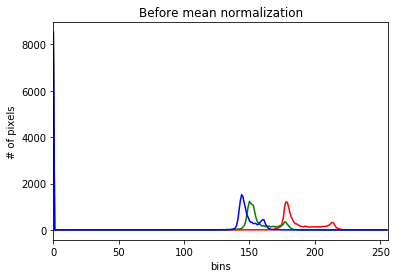

In [36]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.title("Before mean normalization")
    plt.ylabel("# of pixels")
    plt.xlabel("bins")
    plt.xlim([0,256])

plt.savefig("b_n", dpi=150)
plt.show()

In [37]:
def n1(img):
    img = img.astype('float32')
    img /= 255
    return img

def n2(img):
    mean = np.mean(img,axis=(0,1,2))
    std = np.std(img,axis=(0,1,2))
    img_norm = (img-mean)/(std+1e-7)
    return img_norm

def standardize(img):
    s = img - np.mean(img, axis=(2,0,1), keepdims=True)
    s /= (np.std(s, axis=(2,0,1), keepdims=True) + 1e-7)
    return s

In [38]:
img_n1 = n1(img)
img_n2 = n2(img)

In [39]:
img_n1.shape

(151, 148, 3)

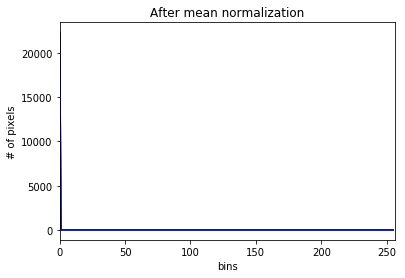

In [40]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_n1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.title("After mean normalization")
    plt.ylabel("# of pixels")
    plt.xlabel("bins")
    plt.xlim([0,256])
    
plt.savefig("a_n", dpi=150)
plt.show()

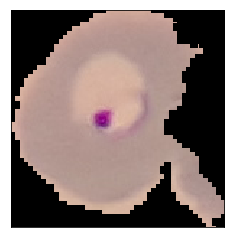

In [41]:
plt.imshow(img)
plt.xticks([])
plt.yticks([])

plt.savefig("normal", dpi=150)

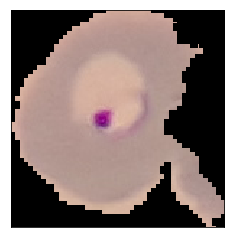

In [42]:
plt.imshow(img_n1)
plt.xticks([])
plt.yticks([])

plt.savefig("mean_norm", dpi=150)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


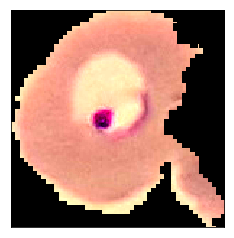

In [43]:
plt.imshow(img_n2)
plt.xticks([])
plt.yticks([])

plt.savefig("standarize", dpi=150)